In [6]:
from astropy.io import fits
hdul = fits.open('../../apogee_distances-DR14.fits')

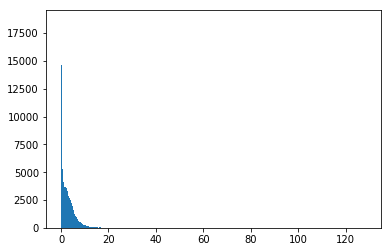

In [42]:
import matplotlib.pyplot as plt

dat = hdul[1].data
d1 = dat.field(4)
d1 = d1[~isnan(d1)]
plt.hist(d1,bins='fd')
plt.show()

In [47]:
cols = hdul[1].columns
cols

ColDefs(
    name = 'APOGEE_ID'; format = '20A'
    name = 'ASPCAP_ID'; format = '50A'
    name = 'BPG_dist05'; format = 'E'; unit = 'kpc'
    name = 'BPG_dist16'; format = 'E'; unit = 'kpc'
    name = 'BPG_dist50'; format = 'E'; unit = 'kpc'
    name = 'BPG_dist84'; format = 'E'; unit = 'kpc'
    name = 'BPG_dist95'; format = 'E'; unit = 'kpc'
    name = 'BPG_meandist'; format = 'E'; unit = 'kpc'
    name = 'BPG_diststd'; format = 'E'; unit = 'kpc'
    name = 'BPG_AV05'; format = 'E'; unit = 'mag'
    name = 'BPG_AV16'; format = 'E'; unit = 'mag'
    name = 'BPG_AV50'; format = 'E'; unit = 'mag'
    name = 'BPG_AV84'; format = 'E'; unit = 'mag'
    name = 'BPG_AV95'; format = 'E'; unit = 'mag'
    name = 'BPG_meanAV'; format = 'E'; unit = 'mag'
    name = 'BPG_AVstd'; format = 'E'; unit = 'mag'
    name = 'BPG_INPUTFLAGS'; format = '80A'
    name = 'BPG_OUTPUTFLAGS'; format = '50A'
    name = 'NAOC_dist'; format = 'E'; unit = 'kpc'
    name = 'NAOC_err_dist'; format = 'E'; unit = 'kpc